In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd 
import re
import warnings
warnings.filterwarnings("ignore")

## own stuff ##
from main_functions import daily_increase
from main_functions import moving_average
from main_functions import get_country_info

In [10]:
## ~~ READING DATA ~~ ##
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [11]:
## ~~ USEFUL VALUES FOR LATER ~~ ##
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()
## Creating List of "First Day of the Month" Dates for nicer plotting
months = []

for date in dates:
	month = re.findall(r"([0-9]{1,2}/1/20)", date)
	if month:
		months.append(month[0])

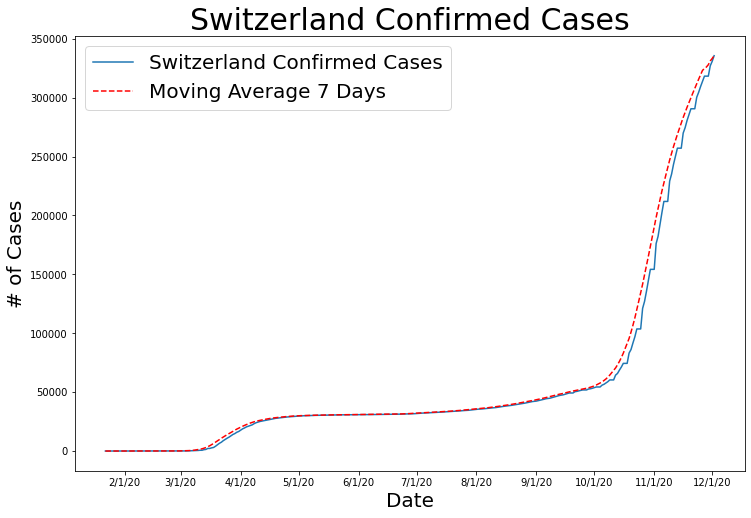

In [12]:
## ~~CUMULATIVE CASES OVER TIME~~ ##
## window for moving average in days
window = 7

def cumulative_plot(x, y1, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    
    plt.figure(figsize=(12, 8))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Date', size=20)
    plt.ylabel('# of Cases', size=20)
    plt.yticks(size=10)

    plt.xticks(months, size=10)

    plt.show()       

    
def cumulative_visualization(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    
    cumulative_plot(dates, country_cases, country_name)


cumulative_visualization("Switzerland")